# <center>Optimization Project</center>

This notebook contains the questions of the practical session along with complementary guidelines and examples. The code is written in Python. The questions are in red and numbered from 1 to 5.

## Code demo

Seat and relax, we will show you how to use the code for optimizing functions.
First plot examples of 2D functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import test_functions


# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = test_functions.rosen

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 

x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.gca( projection='3d')
#axis.set_zlim(0,150)
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()
# figure.savefig('plot.pdf')

Now carry out some optimizations.

search stopped after 1273 evaluations of f because of too small step 
best objective function = 163.99926669790324
best x = [-6.91573637e-10  5.24312332e-01  1.43978999e+00  2.54250057e+00
  3.17821048e+00  4.12624130e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00]


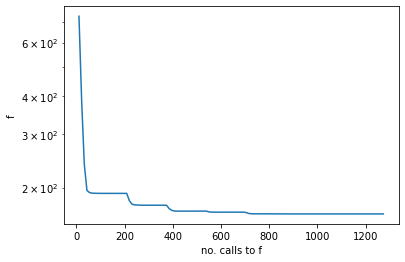

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import test_functions
from random_search import random_opt
from gradient_descent import gradient_descent
from optim_utilities import print_rec

#########################
# function definition
fun = test_functions.sphereL1
dim = 10
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
# start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
start_x = np.random.uniform(low=LB,high=UB)

budget = 1000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
# res = random_opt(func=fun, LB=LB, UB=UB, budget=budget, printlevel=printlevel)
res = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,
                       budget=budget,
                       step_factor=0.1,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,
                       printlevel=printlevel)

#########################
# reporting
print_rec(res=res, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)


## Understanding the code through an example

Let us consider the following test function which is associated to machine learning :

$$ f(x) = \sum_{i=1}^n (x_i - c_i)^2 + \lambda \sum_{i=1}^n \lvert x_i\rvert \quad,\quad \lambda \ge 0 $$
$$ c_i = i \quad \text{ and } \quad -5 = LB_i \le x_i \le UB_i = 5 \quad,\quad i=1,\ldots,n $$  

* First term: sphere function centered at $c$. A simplistic model to the mean square error of a NN where $c$ minimizes the training error.
* Second term: L1 norm times $\lambda$. The $x_i$'s would be the weights of a NN.
This term helps in improving the test error.

The function is already coded in `test_functions.py` as `sphereL1`. $\lambda$ is set in the function (open the file in your preferred Python editor).





Let us first plot the function in 2 dimensions:

/tmp/ipykernel_201043/3915023405.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca( projection='3d')


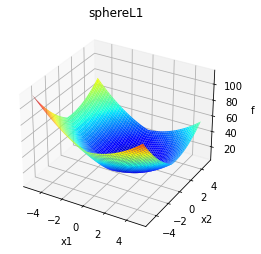

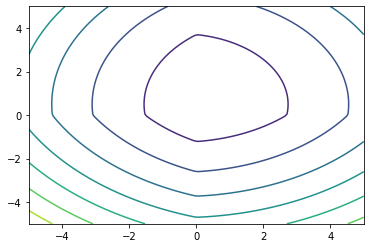

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import test_functions


# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = test_functions.sphereL1

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.gca( projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


## <span style="color:red"> Questions : optimizing the `sphereL1` function </span>

You will optimize the `sphereL1` function for various values of $\lambda$, $\lambda = \{0.001,0.1,1,5,10\}$ in `dim=10` dimensions.

To do this, edit the `main_optim.py` file, which gives an example with the code provided, and make sure that the function is described as follows  
```
# function definition
fun = test_functions.sphereL1
dim = 10
LB = [-5] * dim
UB = [5] * dim

```

Repeat optimizations for varying $\lambda$'s (parameter `lbda` in `test_functions.sphereL1`)
The results can be put in a table as below : 
  
| lbda  | $x^\star$  | $f(x^\star)$  |  
| :---:  | :---:  | :----:  |  
|  value 1  |  your values  |  your value  |  
|  value 2  |  your values  |  your value  |  


1. <span style="color:red">What do you notice ?</span>  
2. <span style="color:red">Assuming the $x$'s are weights of a neural network, what would be the effect of $\lambda$ on the network ?</span>  


Note : when changing `lbda`, it is important to reload the kernel or, to make it automatic, add the following lines of code
```
%load_ext autoreload
%autoreload 2
```


---


# A NEURAL NETWORK FROM SCRATCH

First let's import the needed modules. You are encouraged to have a look at `forward_propagation`.

In [4]:
import numpy as np
from typing import Union, Callable, List
from copy import deepcopy
from optim_utilities import print_rec

from forward_propagation import (
    forward_propagation, 
    create_weights, 
    vector_to_weights,
    weights_to_vector)

from activation_functions import relu, sigmoid 
from test_functions import (
    linear_function,
    ackley,
    sphere,
    quadratic,
    rosen,
    L1norm,
    sphereL1
)

from gradient_descent import gradient_descent

%load_ext autoreload
%autoreload 2
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data structure behind the forward propagation

The following network has 2 layers, the first going from 4 input components to the 3 internal neurons, the second going from the 3 internal neurons outputs to the 2 outputs. Don't forget the additional weight for the neurons biases.

In [5]:
inputs = np.array([[1,2,5,4],[1,0.2,0.15,0.024]])
weights = [
        np.array(
            [
                [1,0.2,0.5,1,-1],
                [2,1,3,5,0],
                [0.2,0.1,0.6,0.78,1]
            ]
        ),
    np.array(
            [
                [1,0.2,0.5,1],
                [2,1,3,5]
            ]
        )
    ]
activation = sigmoid
forward_propagation(inputs,weights,activation)

array([[0.93695121, 0.99998324],
       [0.89266103, 0.99991581]])

### Create a data set 
The data set is made of points sampled randomly from a function.

In [6]:
def simulate_data_target(fun: Callable,
                       n_features: int,
                       n_obs: int,
                       LB: List[float],
                       UB: List[float]) -> dict:
    
    entry_data = np.random.uniform(low= LB,high=UB,
                                   size=(n_obs, n_features))
    target = np.apply_along_axis(fun, 1, entry_data)
    
    return {"data": entry_data, "target": target}

In [7]:
used_function = linear_function
n_features = 2
n_obs = 10
LB = [-5] * n_features
UB = [5] * n_features
simulated_data = simulate_data_target(fun = used_function,
                                      n_features = n_features,
                                      n_obs=n_obs,LB=LB,UB=UB)

simulated_data

### Make a neural network, randomly initialize its weights, propagate input data

Create a NN with 1 layer, 2 inputs and 1 output. Propagate the data inputs through it.

In [8]:
network_structure = [2,1]
weights = create_weights(network_structure)
weights_as_vector,_ = weights_to_vector(weights)
dim = len(weights_as_vector)
print("weights=",weights)
print("dim=",dim)

weights= [array([[-0.58475832,  0.18143078, -0.52424794]])]
dim= 3


In [9]:
predicted_output = forward_propagation(simulated_data["data"],weights,sigmoid)
print(predicted_output)

[[0.73635787]
 [0.15422315]
 [0.70330372]
 [0.93844257]
 [0.32343756]
 [0.95818298]
 [0.04787334]
 [0.68176726]
 [0.66046736]
 [0.37635103]]


In [ ]:
simulated_data["target"]

In [ ]:
predicted_output.reshape(-1,)

### Error functions 

A utility function to transform a vector into weight matrices. You will probably not need it, but this is used in the calculation of the error function (the vector is transformed into NN weights, ...).

In [ ]:
vector_to_weights([0.28677805, -0.07982693,  0.37394315],network_structure)

We define 2 error functions, one for regression is the mean square error, the other is the cross-entropy error for classification.

In [12]:
# mean squared error
def cost_function_mse(y_predicted: np.ndarray,y_observed: np.ndarray):
    error = 0.5 * np.mean((y_predicted - y_observed)**2)
    return error

In [ ]:
# entropy
def cost_function_entropy(y_predicted: np.ndarray,y_observed: np.ndarray):

    n = len(y_observed)
    
    term_A = np.multiply(np.log(y_predicted),y_observed)
    term_B = np.multiply(1-y_observed,np.log(1-y_predicted))
    
    error = - (1/n)*(np.sum(term_A)+np.sum(term_B))

    return(error)

In [13]:
def error_with_parameters(vector_weights: np.ndarray,
                          network_structure: List[int],
                          activation_function: Callable,
                          data: dict,
                          cost_function: Callable,
                          regularization: float = 0) -> float:
    
    weights = vector_to_weights(vector_weights,
                                used_network_structure)
    predicted_output = forward_propagation(data["data"],weights,
                                           activation_function)
    predicted_output = predicted_output.reshape(-1,)
    
    error = cost_function(predicted_output,data["target"]) + 
    regularization * np.sum(np.abs(vector_weights))
    
    return error

In [14]:
used_network_structure = [2,1] # 2 inputs features, 1 layer with 1 node
used_activation = relu
used_data = simulated_data
used_cost_function = cost_function_mse


def neural_network_cost(vector_weights):
    
    cost = error_with_parameters(vector_weights,
                                 network_structure = used_network_structure,
                                 activation_function = used_activation,
                                 data = used_data,
                                 cost_function = used_cost_function)
    
    return cost

Below, the cost function associated to the neural network is calculated from a simple vector in a manner similar to $f(x)$, therefore prone to optimization. The translation of the vector into as many weight matrices as necessary is done thanks to the `used_network_structure` defined above and passed implicitely thanks to Python's scoping rules.

In [15]:
random_weights_as_vect = np.random.uniform(size=dim)
neural_network_cost(random_weights_as_vect)

14.016366379291657

### Learn the network by gradient descent

In [16]:
LB = [-5] * 3 
UB = [5] * 3
printlevel = 1
res = gradient_descent(func = neural_network_cost,
                 start_x = np.array([0.28677805, -0.07982693,  0.37394315]),
                 LB = LB, UB = UB,budget = 1000,printlevel=printlevel)

In [17]:
print_rec(res=res, fun=neural_network_cost, dim=len(res["x_best"]), 
          LB=LB, UB=UB , printlevel=printlevel, logscale = False)

## <span style="color:red"> Question : Make your own network</span>

3. <span style="color:red">Generate 100 data points with the quadratic function in 2 dimensions.</span>
4. <span style="color:red">Create a network with 2 inputs, 5 ReLU neurons in the hidden layer, and 1 output.</span>
5. <span style="color:red">Learn it on the quadratic data points you generated. Plot some results, discuss them.</span>